In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Loading the data

In [3]:
df = pd.read_csv('Titanic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


EDA

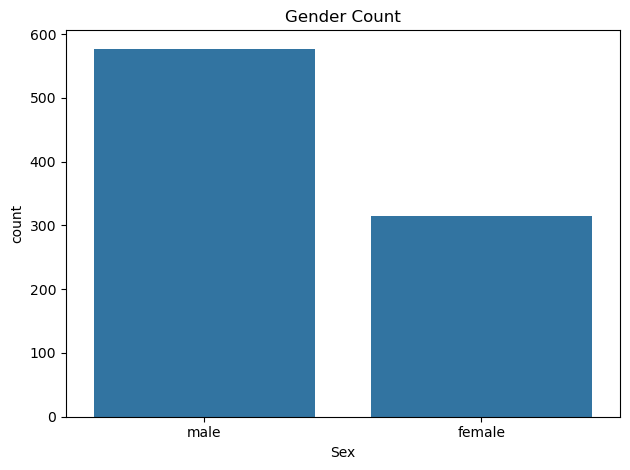

In [10]:
sns.countplot(x = 'Sex', data = df)
plt.title('Gender Count')
plt.tight_layout()
plt.show()
#there were more male passengers than female

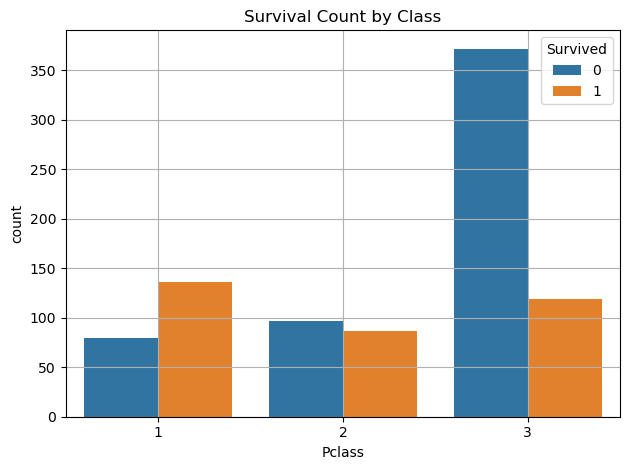

In [11]:
sns.countplot(x = 'Pclass',hue = 'Survived' , data = df) 
plt.title('Survival Count by Class')
plt.tight_layout()
plt.grid(True)
plt.show()
#passengers from 1 st class Survived more than others 

In [12]:
df['Age'].max()

80.0

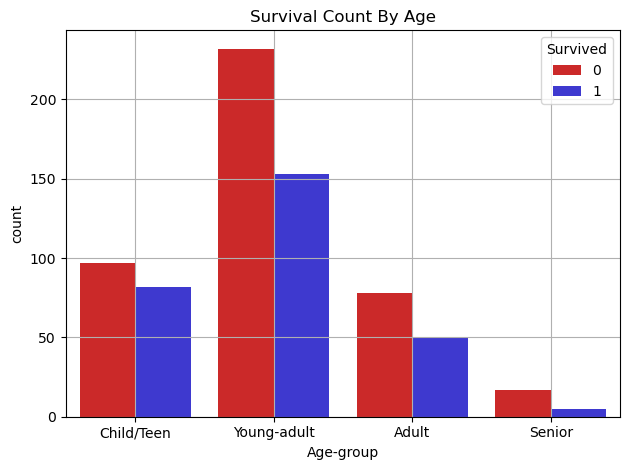

In [13]:
df['Age-group']  = pd.cut(df['Age'],bins =[0,20,40,60,80],labels = ['Child/Teen','Young-adult','Adult','Senior'])
choice_colours = {0:'#E60E0E',1:'#2720E8'}
sns.countplot(x = 'Age-group',hue = 'Survived',data = df,palette = choice_colours)
plt.title('Survival Count By Age')
plt.tight_layout()
plt.grid(True)
plt.show()
# passengers of age group 20 -40 survived more 

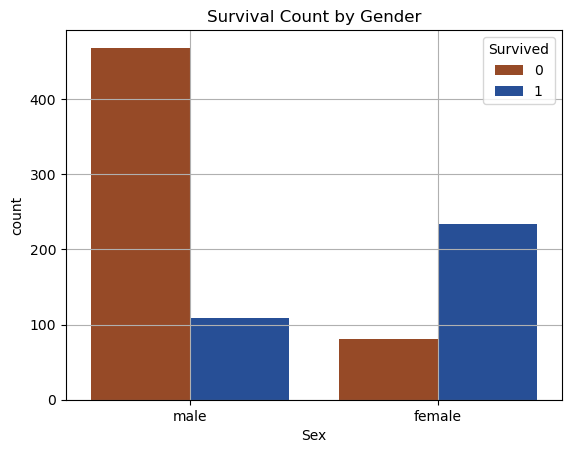

In [14]:
colour_choice = {0:'#A84314',1:'#144AA8'}
sns.countplot(x = 'Sex',hue = 'Survived',data = df,palette = colour_choice)
plt.title("Survival Count by Gender")
plt.grid(True)
plt.show()
#female passengers Survived more than male passengers

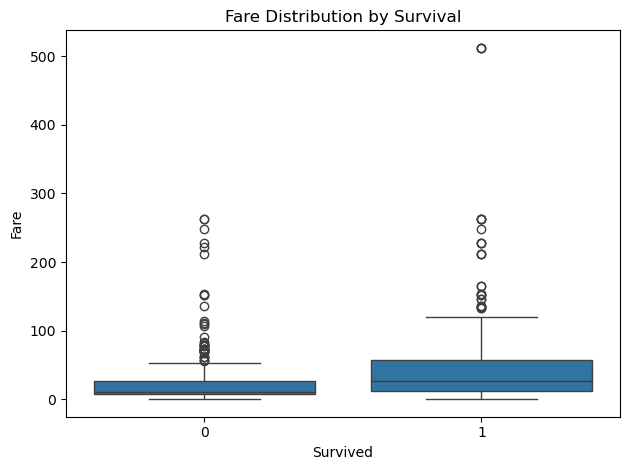

In [15]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.tight_layout()
# people with high fare survived more

PREPROCESSING & HANDLING VALUES  , FEATURE ENGINEERING

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age-group      177
dtype: int64

In [18]:
from sklearn.impute import SimpleImputer 
num_imputer = SimpleImputer(strategy = 'mean')
df[['Age']] = num_imputer.fit_transform(df[['Age']])
cat_imputer = SimpleImputer(strategy = 'most_frequent')
df[['Embarked']] = cat_imputer.fit_transform(df[['Embarked']])



In [19]:
df.drop(columns ='Age-group',axis = 1,inplace=True,errors = 'ignore')

In [20]:
df['Known_cabin'] = df['Cabin'].notnull().astype(int)
df.drop(columns= 'Cabin',inplace = True)

In [21]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Known_cabin    0
dtype: int64

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Known_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [23]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [24]:
df.drop(columns = ['SibSp','Parch'],inplace = True)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Known_cabin,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,112053,30.0000,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,W./C. 6607,23.4500,S,0,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,111369,30.0000,C,1,1


Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder_1 = LabelEncoder()

df['Sex'] = encoder_1.fit_transform(df['Sex'])
#1 : male , 0:female

In [27]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False, drop="first")
embarked_encoded = cat_encoder.fit_transform(df[['Embarked']])
embarked_df = pd.DataFrame(embarked_encoded, 
                           columns=cat_encoder.get_feature_names_out(['Embarked']),
                           index=df.index)
df = pd.concat([df.drop('Embarked', axis=1), embarked_df], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Known_cabin,Family_Size,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,A/5 21171,7.2500,0,2,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,PC 17599,71.2833,1,2,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,STON/O2. 3101282,7.9250,0,1,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,113803,53.1000,1,2,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,373450,8.0500,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,211536,13.0000,0,1,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,112053,30.0000,1,1,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,W./C. 6607,23.4500,0,4,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,111369,30.0000,1,1,0.0,0.0


In [28]:
df.drop(columns = ['Name','Ticket'],inplace = True)

In [30]:
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Known_cabin,Family_Size,Embarked_Q,Embarked_S
0,1,0,3,1,22.000000,7.2500,0,2,0.0,1.0
1,2,1,1,0,38.000000,71.2833,1,2,0.0,0.0
2,3,1,3,0,26.000000,7.9250,0,1,0.0,1.0
3,4,1,1,0,35.000000,53.1000,1,2,0.0,1.0
4,5,0,3,1,35.000000,8.0500,0,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,13.0000,0,1,0.0,1.0
887,888,1,1,0,19.000000,30.0000,1,1,0.0,1.0
888,889,0,3,0,29.699118,23.4500,0,4,0.0,1.0
889,890,1,1,1,26.000000,30.0000,1,1,0.0,0.0


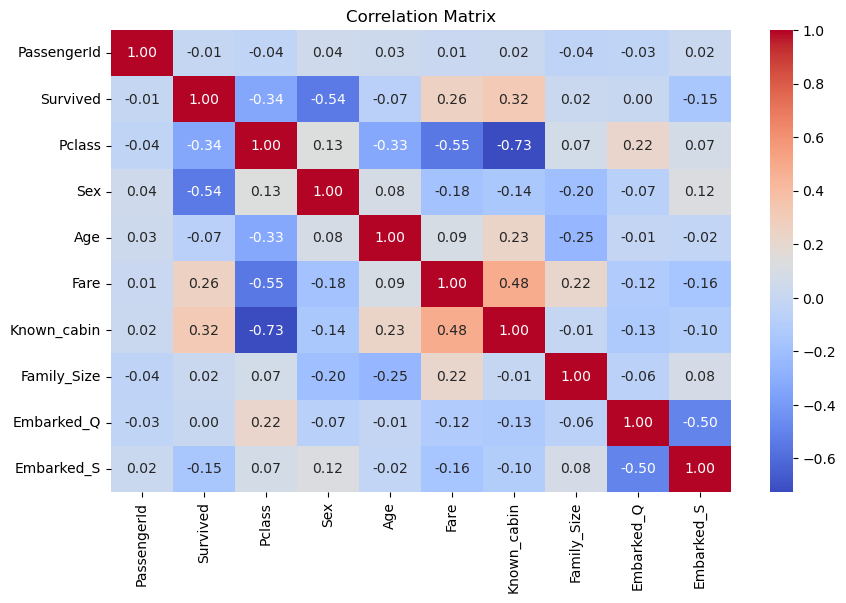

In [31]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,cmap = 'coolwarm',annot= True,fmt = '.2f')
plt.title('Correlation Matrix')
plt.show() 

Creating test and train set 

In [46]:
from sklearn.model_selection import StratifiedShuffleSplit

In [48]:
split= StratifiedShuffleSplit(n_splits = 1,test_size=0.2,random_state = 42)
for train_index , test_index in split.split(df,df['Survived']):
     train_set = df.loc[train_index]
     test_set = df.loc[test_index]

In [50]:
train_set.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Known_cabin,Family_Size,Embarked_Q,Embarked_S
692,693,1,3,1,29.699118,56.4958,0,1,0.0,1.0
481,482,0,2,1,29.699118,0.0000,0,1,0.0,1.0
527,528,0,1,1,29.699118,221.7792,1,1,0.0,1.0
855,856,1,3,0,18.000000,9.3500,0,2,0.0,1.0
801,802,1,2,0,31.000000,26.2500,0,3,0.0,1.0


In [52]:
test_set.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Known_cabin,Family_Size,Embarked_Q,Embarked_S
565,566,0,3,1,24.000000,24.1500,0,3,0.0,1.0
160,161,0,3,1,44.000000,16.1000,0,2,0.0,1.0
553,554,1,3,1,22.000000,7.2250,0,1,0.0,0.0
860,861,0,3,1,41.000000,14.1083,0,3,0.0,1.0
241,242,1,3,0,29.699118,15.5000,0,2,1.0,0.0


Working On  Train set

In [130]:
x_train_features = train_set.drop(columns= 'Survived',axis = 1)
y_train_labels =  train_set['Survived']
x_test_features = test_set.drop(columns= 'Survived',axis = 1)
y_test_labels =  test_set['Survived']


Model Selection

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# pipeline = Pipeline ()

In [128]:
def Model_Evaluator(model,x,y):
    z = Pipeline([
        
        ('prep',pipeline),
        ('model',model)
        ])
    scores = cross_val_score(z,x,y, scoring = 'accuracy',cv = 10 )
    return pd.Series(scores)
print(f"Logistic Regression : {Model_Evaluator(LogisticRegression(max_iter=1000),x_train_features ,y_train_labels)}")
print(f"Decision Tree Classifier : {Model_Evaluator(DecisionTreeClassifier(random_state=42),x_train_features ,y_train_labels)}")
print(f"Random Forest Classifier : {Model_Evaluator(RandomForestClassifier(random_state=42),x_train_features ,y_train_labels)}")
#Logistic regression is best 

Logistic Regression : 0    0.750000
1    0.875000
2    0.774648
3    0.732394
4    0.816901
5    0.788732
6    0.830986
7    0.788732
8    0.816901
9    0.788732
dtype: float64
Decision Tree Classifier : 0    0.708333
1    0.777778
2    0.746479
3    0.647887
4    0.816901
5    0.774648
6    0.774648
7    0.802817
8    0.746479
9    0.859155
dtype: float64
Random Forest Classifier : 0    0.694444
1    0.861111
2    0.788732
3    0.718310
4    0.802817
5    0.830986
6    0.859155
7    0.774648
8    0.816901
9    0.816901
dtype: float64


In [136]:
final_model = Pipeline(
    [('prep',pipeline),
    ('model',LogisticRegression(max_iter=1000))
    ])
final_model.fit(x_train_features,y_train_labels)
prediction = final_model.predict(x_test_features)

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test_labels, prediction))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, prediction))
print("\nClassification Report:\n", classification_report(y_test_labels, prediction))

Accuracy: 0.7988826815642458

Confusion Matrix:
 [[93 17]
 [19 50]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

